The original ratings file was divided into five nearly equal parts to:

make processing manageable

enable modular analysis

simulate working with partitioned data (common in industry)

This was done using a custom Python script that reads the file line-by-line to avoid memory overload.

In [4]:
import os

input_file = "ratings.dat"


In [13]:
with open(input_file, "r") as f:
    lines = sum(1 for _ in f)

num_parts = 5
lines_per_part = total_lines // num_parts

In [9]:
output_files = []
for i in range(num_parts):
    file_name = f"ratings_part_{i+1}.dat"
    output_files.append(open(file_name, "w"))

In [10]:
# Step 4: Read input file and distribute lines
with open(input_file, "r") as f:
    current_part = 0
    current_line_count = 0

    for line in f:
        output_files[current_part].write(line)
        current_line_count += 1

        if current_line_count >= lines_per_part and current_part < num_parts - 1:
            current_part += 1
            current_line_count = 0

for file in output_files:
    file.close()


### Sorting by Rating

Two approaches were implemented:

Manual Sorting

- Custom insertion sort

- Applied to a subset of data for feasibility

- Used to demonstrate algorithmic understanding

Built-in Sorting

- Python’s optimized sorted() function

- Applied to the full dataset

- Used to benchmark performance

Execution time was measured for both methods and compared.

In [14]:
import time

ratings = []


for i in range(1, 6):
    filename = f"ratings_part_{i}.dat"
    with open(filename, "r", encoding="latin-1") as f:
        for line in f:
            parts = line.strip().split("::")
            movie_id = int(parts[1])
            rating = float(parts[2])
            ratings.append((movie_id, rating))

print("Total ratings loaded:", len(ratings))


Total ratings loaded: 10000054


In [15]:
manual_data = ratings[:50000]

In [16]:
# i ll go with inserttion soRt
def insertionsortdesc(data):
    for i in range(1, len(data)):
        key = data[i]
        j = i - 1
        while j >= 0 and data[j][1] < key[1]:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key



In [17]:
start_time = time.time()
insertionsortdesc(manual_data)
end_time = time.time()

print("Manual sort time (seconds):", end_time - start_time)


Manual sort time (seconds): 140.66589283943176


In [18]:
start_time = time.time()
sorted_ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
end_time = time.time()

print("Built-in sort time (seconds):", end_time - start_time)


Built-in sort time (seconds): 2.9542267322540283


In [19]:
print("Top 5 highest rated entries:")
print(sorted_ratings[:5])

print("Bottom 5 lowest rated entries:")
print(sorted_ratings[-5:])


Top 5 highest rated entries:
[(122, 5.0), (185, 5.0), (231, 5.0), (292, 5.0), (316, 5.0)]
Bottom 5 lowest rated entries:
[(196, 0.5), (1320, 0.5), (1876, 0.5), (1997, 0.5), (2003, 0.5)]


Histogram of Movie Ratings

A histogram was created to visualize how users rate movies overall.

Key considerations:

- Ratings range from 0.5 to 5.0

- Histogram computation time was measured using NumPy

- Plot rendering time was excluded to ensure fair benchmarking

In [27]:
import numpy as np
ratings_only = [r for (_, r) in ratings]

start_time = time.time()
counts, bin_edges = np.histogram(ratings_only, bins=10)
end_time = time.time()
print("Histogram computation time:", end_time - start_time)

Histogram computation time: 0.8807497024536133


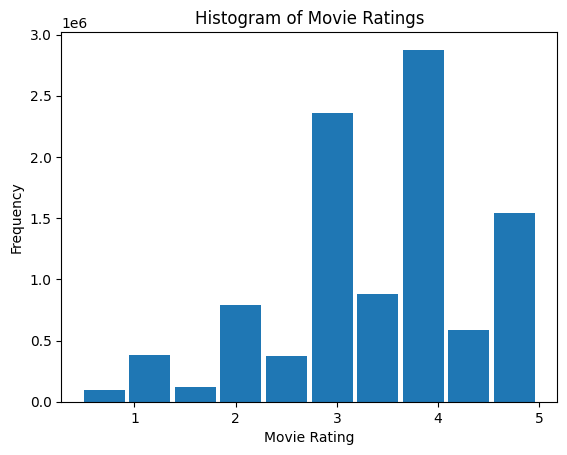

In [28]:
import matplotlib.pyplot as plt



plt.figure()
plt.bar(bin_edges[:-1], counts, width=(bin_edges[1]-bin_edges[0])*0.9, align="edge")
plt.xlabel("Movie Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Ratings")
plt.show()


Movie Popularity Analysis

For each movie, the total number of ratings was counted.

This revealed:

- Most movies receive relatively few ratings

- A small number of movies dominate user attention

- A long-tail distribution typical of real-world platforms

In [32]:
movie_rating_count = {}

start_time = time.time()

for i in range(1, 6):
    filename = f"ratings_part_{i}.dat"
    with open(filename, "r", encoding="latin-1") as f:
        for line in f:
            parts = line.strip().split("::")
            movie_id = int(parts[1])

            if movie_id in movie_rating_count:
                movie_rating_count[movie_id] += 1
            else:
                movie_rating_count[movie_id] = 1

end_time = time.time()

print("Total unique movies:", len(movie_rating_count))
print("Time to count ratings per movie :", end_time - start_time)

rating_counts = list(movie_rating_count.values())


Total unique movies: 10677
Time to count ratings per movie : 12.050827264785767


In [33]:

start_time = time.time()
counts, bin_edges = np.histogram(rating_counts, bins=20)
end_time = time.time()

print("Histogram computation time (seconds):", end_time - start_time)


Histogram computation time (seconds): 0.012585639953613281


In [ ]:

plt.figure()
plt.bar(bin_edges[:-1], counts, width=(bin_edges[1]-bin_edges[0])*0.9, align="edge")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.title("Histogram of Movie Rating Counts")
plt.show()


Low vs High Rating Comparison

The rating distribution was split into:

- Lowest three bins: 0.5, 1.0, 1.5

- Highest three bins: 4.0, 4.5, 5.0

Separate histograms were created to analyze user sentiment.
Results show a clear positive bias, with users far more likely to give high ratings than low ones.

In [37]:
low_bins = [0.5, 1.0, 1.5]
high_bins = [4.0, 4.5, 5.0]

low_ratings = [r for r in ratings_only if r in low_bins]
high_ratings = [r for r in ratings_only if r in high_bins]

print("Low bin ratings count:", len(low_ratings))
print("High bin ratings count:", len(high_ratings))


Low bin ratings count: 597446
High bin ratings count: 5005684


In [38]:
start_time = time.time()
low_counts, low_edges = np.histogram(low_ratings, bins=3)
end_time = time.time()

print("Low bins histogram computation time:", end_time - start_time)


Low bins histogram computation time: 0.12627720832824707


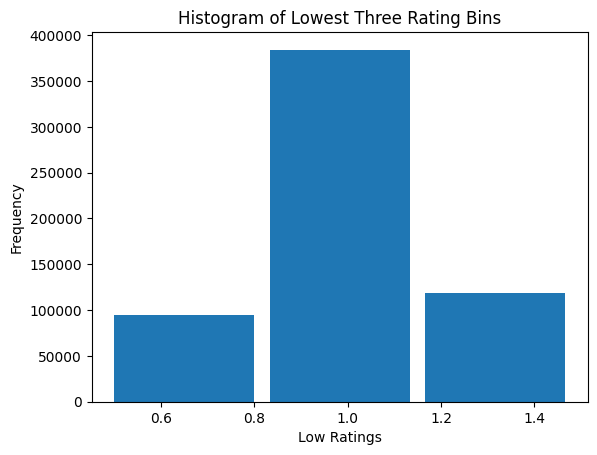

In [39]:
plt.figure()
plt.bar(low_edges[:-1], low_counts,
        width=(low_edges[1]-low_edges[0])*0.9,
        align="edge")
plt.xlabel("Low Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Lowest Three Rating Bins")
plt.show()


In [40]:
start_time = time.time()
high_counts, high_edges = np.histogram(high_ratings, bins=3)
end_time = time.time()

print("High bins histogram computation time:", end_time - start_time)


High bins histogram computation time: 0.7167623043060303


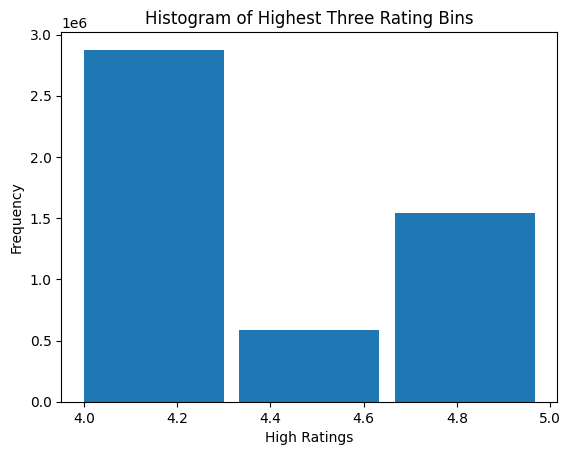

In [41]:
plt.figure()
plt.bar(high_edges[:-1], high_counts,
        width=(high_edges[1]-high_edges[0])*0.9,
        align="edge")
plt.xlabel("High Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Highest Three Rating Bins")
plt.show()
